## Import the libraries

In [138]:
# import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Set up the data

In [139]:
# setup X_train, y_train, X_test, y_test
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

## Create classes

In [140]:
# Create classes
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

## Plot image example

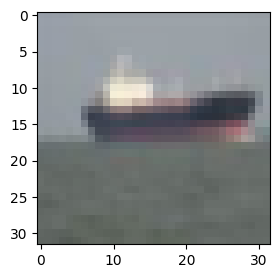

In [141]:
# plot a random image from X_train
plt.figure(figsize= (3,6))
plt.imshow(X_train[69])

## Plot image example with their class name 

In [142]:
# Create index to call class name
y_train_index = tf.constant(y_train)
y_train_index = tf.squeeze(y_train_index)
y_train_index[5].numpy()
classes[y_train_index[5].numpy()]

'automobile'

Text(0.5, 1.0, 'airplane')

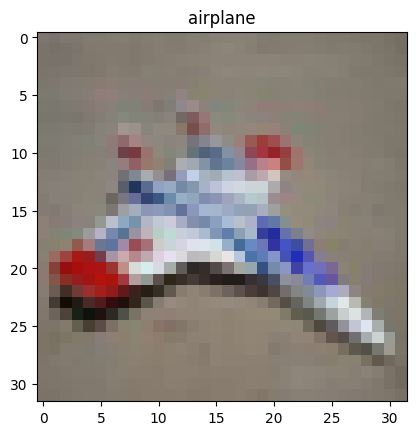

In [143]:
# Plot a example image and its label
index = 30
plt.imshow(X_train[index])
plt.title(classes[y_train_index[index].numpy()])


## Plot multiple random image with labels to visualize the data

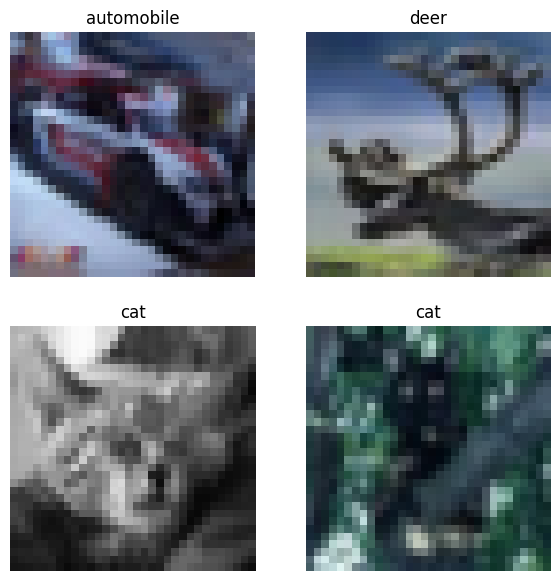

In [144]:
# plot multiple random images with labels
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index])
  plt.title(classes[y_train_index[rand_index].numpy()])
  plt.axis(False)

##  Define accuracy and loss curve graph function

In [145]:
# Plot accuracy loss  curve
def accloss(history):
  # plot loss
  plt.subplot(211)
  plt.title("Cross Entropy Loss")
  plt.plot(history.history['loss'], color='blue',label ='train')
  plt.plot(history.history['val_loss'], color='orange', label ='test')
  # plot accuracy
  plt.subplot(212)
  plt.title("Classification Accuracy")
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')


## Normalize the data

In [146]:
# Normalize the data
X_train.max(), X_test.max()

(255, 255)

In [147]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0
X_train_norm.min(), X_train_norm.max()

(0.0, 1.0)

In [148]:
X_train_norm.shape

(50000, 32, 32, 3)

## One hot encode the labels

In [81]:
# lets one hot encode y_train
y_train_one = tf.squeeze(tf.one_hot(y_train, depth = 10))

In [82]:
y_test_one = tf.squeeze(tf.one_hot(y_test, depth = 10))

## Create the model
* this model is created after many trials and errors this is my final model.

Epoch 1/50
781/781 [==============================] - 165s 208ms/step - loss: 1.7532 - accuracy: 0.3929 - val_loss: 1.3123 - val_accuracy: 0.5361
Epoch 2/50
781/781 [==============================] - 160s 205ms/step - loss: 1.2550 - accuracy: 0.5486 - val_loss: 1.0501 - val_accuracy: 0.6249
Epoch 3/50
781/781 [==============================] - 159s 204ms/step - loss: 1.0694 - accuracy: 0.6228 - val_loss: 0.9497 - val_accuracy: 0.6664
Epoch 4/50
781/781 [==============================] - 160s 204ms/step - loss: 0.9474 - accuracy: 0.6679 - val_loss: 0.7935 - val_accuracy: 0.7221
Epoch 5/50
781/781 [==============================] - 160s 205ms/step - loss: 0.8768 - accuracy: 0.6944 - val_loss: 0.7539 - val_accuracy: 0.7404
Epoch 6/50
781/781 [==============================] - 160s 205ms/step - loss: 0.8089 - accuracy: 0.7195 - val_loss: 0.7782 - val_accuracy: 0.7342
Epoch 7/50
781/781 [==============================] - 160s 205ms/step - loss: 0.7650 - accuracy: 0.7337 - val_loss: 0.6649 -

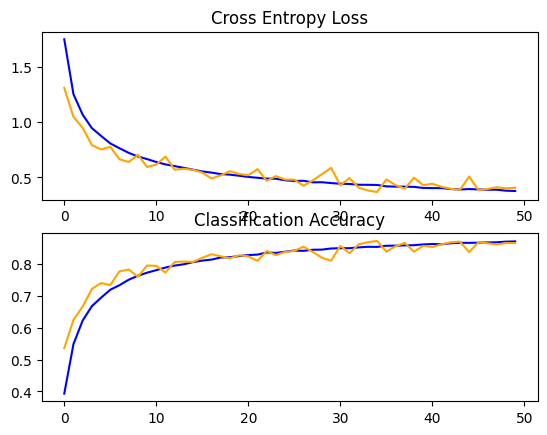

In [24]:
from keras.preprocessing.image import ImageDataGenerator
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same', input_shape=(32,32,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3, 3), activation = 'relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64,(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', kernel_initializer ='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer = 'he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# 2. Compile the model
model_13.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])
# Creatw a data generator
datagen = ImageDataGenerator (width_shift_range=0.1, height_shift_range=0.1, horizontal_flip =True)

# Create a iterator
it_train = datagen.flow(X_train_norm, y_train_one, batch_size = 64)

# 3. Fit the  model
steps= int(X_train_norm.shape[0] / 64)
history = model_13.fit(it_train, steps_per_epoch = steps,
            validation_data = (X_test_norm, y_test_one),
            epochs = 50,
                        )
# 4. Evaluate the model
model_13.evaluate(X_test_norm, y_test_one)

# 5. plot accloss
accloss(history)

## Model training Output and loss-accuracy curve graph

In [ ]:
Epoch 1/50
781/781 [==============================] - 165s 208ms/step - loss: 1.7532 - accuracy: 0.3929 - val_loss: 1.3123 - val_accuracy: 0.5361
Epoch 2/50
781/781 [==============================] - 160s 205ms/step - loss: 1.2550 - accuracy: 0.5486 - val_loss: 1.0501 - val_accuracy: 0.6249
Epoch 3/50
781/781 [==============================] - 159s 204ms/step - loss: 1.0694 - accuracy: 0.6228 - val_loss: 0.9497 - val_accuracy: 0.6664
Epoch 4/50
781/781 [==============================] - 160s 204ms/step - loss: 0.9474 - accuracy: 0.6679 - val_loss: 0.7935 - val_accuracy: 0.7221
Epoch 5/50
781/781 [==============================] - 160s 205ms/step - loss: 0.8768 - accuracy: 0.6944 - val_loss: 0.7539 - val_accuracy: 0.7404
Epoch 6/50
781/781 [==============================] - 160s 205ms/step - loss: 0.8089 - accuracy: 0.7195 - val_loss: 0.7782 - val_accuracy: 0.7342
Epoch 7/50
781/781 [==============================] - 160s 205ms/step - loss: 0.7650 - accuracy: 0.7337 - val_loss: 0.6649 - val_accuracy: 0.7773
Epoch 8/50
781/781 [==============================] - 158s 203ms/step - loss: 0.7233 - accuracy: 0.7509 - val_loss: 0.6399 - val_accuracy: 0.7829
Epoch 9/50
781/781 [==============================] - 160s 204ms/step - loss: 0.6901 - accuracy: 0.7634 - val_loss: 0.7052 - val_accuracy: 0.7602
Epoch 10/50
781/781 [==============================] - 159s 204ms/step - loss: 0.6666 - accuracy: 0.7730 - val_loss: 0.5950 - val_accuracy: 0.7956
Epoch 11/50
781/781 [==============================] - 159s 204ms/step - loss: 0.6400 - accuracy: 0.7810 - val_loss: 0.6165 - val_accuracy: 0.7944
Epoch 12/50
781/781 [==============================] - 160s 205ms/step - loss: 0.6184 - accuracy: 0.7892 - val_loss: 0.6895 - val_accuracy: 0.7735
Epoch 13/50
781/781 [==============================] - 160s 204ms/step - loss: 0.6029 - accuracy: 0.7954 - val_loss: 0.5703 - val_accuracy: 0.8068
Epoch 14/50
781/781 [==============================] - 161s 206ms/step - loss: 0.5868 - accuracy: 0.7995 - val_loss: 0.5786 - val_accuracy: 0.8079
Epoch 15/50
781/781 [==============================] - 160s 205ms/step - loss: 0.5704 - accuracy: 0.8064 - val_loss: 0.5692 - val_accuracy: 0.8069
Epoch 16/50
781/781 [==============================] - 163s 208ms/step - loss: 0.5544 - accuracy: 0.8110 - val_loss: 0.5441 - val_accuracy: 0.8199
Epoch 17/50
781/781 [==============================] - 161s 206ms/step - loss: 0.5440 - accuracy: 0.8142 - val_loss: 0.4901 - val_accuracy: 0.8311
Epoch 18/50
781/781 [==============================] - 163s 209ms/step - loss: 0.5306 - accuracy: 0.8207 - val_loss: 0.5185 - val_accuracy: 0.8246
Epoch 19/50
781/781 [==============================] - 162s 207ms/step - loss: 0.5253 - accuracy: 0.8218 - val_loss: 0.5568 - val_accuracy: 0.8184
Epoch 20/50
781/781 [==============================] - 160s 204ms/step - loss: 0.5155 - accuracy: 0.8252 - val_loss: 0.5314 - val_accuracy: 0.8277
Epoch 21/50
781/781 [==============================] - 161s 206ms/step - loss: 0.5047 - accuracy: 0.8284 - val_loss: 0.5196 - val_accuracy: 0.8245
Epoch 22/50
781/781 [==============================] - 161s 206ms/step - loss: 0.4970 - accuracy: 0.8298 - val_loss: 0.5752 - val_accuracy: 0.8102
Epoch 23/50
781/781 [==============================] - 159s 204ms/step - loss: 0.4897 - accuracy: 0.8366 - val_loss: 0.4691 - val_accuracy: 0.8411
Epoch 24/50
781/781 [==============================] - 160s 205ms/step - loss: 0.4883 - accuracy: 0.8352 - val_loss: 0.5121 - val_accuracy: 0.8283
Epoch 25/50
781/781 [==============================] - 165s 211ms/step - loss: 0.4743 - accuracy: 0.8389 - val_loss: 0.4809 - val_accuracy: 0.8383
Epoch 26/50
781/781 [==============================] - 147s 188ms/step - loss: 0.4682 - accuracy: 0.8426 - val_loss: 0.4797 - val_accuracy: 0.8414
Epoch 27/50
781/781 [==============================] - 146s 187ms/step - loss: 0.4698 - accuracy: 0.8417 - val_loss: 0.4247 - val_accuracy: 0.8549
Epoch 28/50
781/781 [==============================] - 145s 186ms/step - loss: 0.4556 - accuracy: 0.8451 - val_loss: 0.4730 - val_accuracy: 0.8385
Epoch 29/50
781/781 [==============================] - 145s 186ms/step - loss: 0.4566 - accuracy: 0.8456 - val_loss: 0.5301 - val_accuracy: 0.8199
Epoch 30/50
781/781 [==============================] - 143s 183ms/step - loss: 0.4491 - accuracy: 0.8491 - val_loss: 0.5868 - val_accuracy: 0.8106
Epoch 31/50
781/781 [==============================] - 145s 186ms/step - loss: 0.4431 - accuracy: 0.8499 - val_loss: 0.4279 - val_accuracy: 0.8572
Epoch 32/50
781/781 [==============================] - 144s 184ms/step - loss: 0.4408 - accuracy: 0.8500 - val_loss: 0.4947 - val_accuracy: 0.8343
Epoch 33/50
781/781 [==============================] - 147s 188ms/step - loss: 0.4336 - accuracy: 0.8526 - val_loss: 0.4072 - val_accuracy: 0.8623
Epoch 34/50
781/781 [==============================] - 144s 185ms/step - loss: 0.4331 - accuracy: 0.8544 - val_loss: 0.3820 - val_accuracy: 0.8689
Epoch 35/50
781/781 [==============================] - 144s 185ms/step - loss: 0.4318 - accuracy: 0.8541 - val_loss: 0.3677 - val_accuracy: 0.8729
Epoch 36/50
781/781 [==============================] - 143s 183ms/step - loss: 0.4192 - accuracy: 0.8577 - val_loss: 0.4820 - val_accuracy: 0.8391
Epoch 37/50
781/781 [==============================] - 142s 182ms/step - loss: 0.4168 - accuracy: 0.8580 - val_loss: 0.4307 - val_accuracy: 0.8561
Epoch 38/50
781/781 [==============================] - 143s 183ms/step - loss: 0.4166 - accuracy: 0.8587 - val_loss: 0.3977 - val_accuracy: 0.8667
Epoch 39/50
781/781 [==============================] - 143s 183ms/step - loss: 0.4145 - accuracy: 0.8595 - val_loss: 0.4981 - val_accuracy: 0.8391
Epoch 40/50
781/781 [==============================] - 146s 186ms/step - loss: 0.4049 - accuracy: 0.8618 - val_loss: 0.4294 - val_accuracy: 0.8573
Epoch 41/50
781/781 [==============================] - 144s 185ms/step - loss: 0.4032 - accuracy: 0.8632 - val_loss: 0.4426 - val_accuracy: 0.8537
Epoch 42/50
781/781 [==============================] - 144s 185ms/step - loss: 0.4032 - accuracy: 0.8623 - val_loss: 0.4150 - val_accuracy: 0.8622
Epoch 43/50
781/781 [==============================] - 144s 184ms/step - loss: 0.3951 - accuracy: 0.8655 - val_loss: 0.3972 - val_accuracy: 0.8684
Epoch 44/50
781/781 [==============================] - 145s 186ms/step - loss: 0.3906 - accuracy: 0.8670 - val_loss: 0.3874 - val_accuracy: 0.8707
Epoch 45/50
781/781 [==============================] - 148s 190ms/step - loss: 0.3949 - accuracy: 0.8668 - val_loss: 0.5078 - val_accuracy: 0.8378
Epoch 46/50
781/781 [==============================] - 144s 185ms/step - loss: 0.3912 - accuracy: 0.8673 - val_loss: 0.3849 - val_accuracy: 0.8686
Epoch 47/50
781/781 [==============================] - 144s 185ms/step - loss: 0.3887 - accuracy: 0.8681 - val_loss: 0.3959 - val_accuracy: 0.8656
Epoch 48/50
781/781 [==============================] - 144s 185ms/step - loss: 0.3886 - accuracy: 0.8686 - val_loss: 0.4102 - val_accuracy: 0.8615
Epoch 49/50
781/781 [==============================] - 145s 185ms/step - loss: 0.3798 - accuracy: 0.8706 - val_loss: 0.4017 - val_accuracy: 0.8665
Epoch 50/50
781/781 [==============================] - 145s 185ms/step - loss: 0.3771 - accuracy: 0.8714 - val_loss: 0.4065 - val_accuracy: 0.8659
313/313 [==============================] - 7s 22ms/step - loss: 0.4065 - accuracy: 0.8659

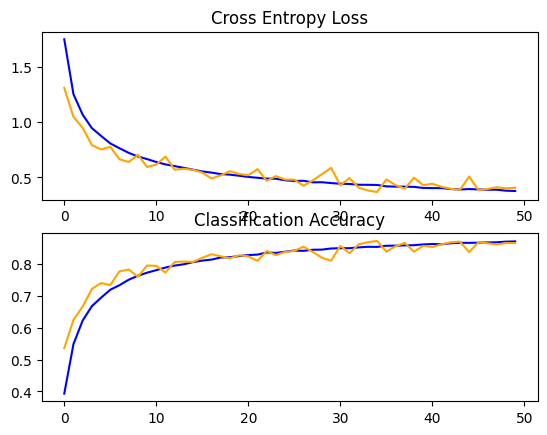

## Lets evaluate with random data and visualize prediction and true value

In [229]:
import random
def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random_image, plots it and labels it with a prediction and truth label.
    """
    # set up a random integer
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    target_image  = images[i]
    pred_probs = model.predict(tf.expand_dims(target_image.reshape(32,32,3),0))
    pred_labels = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    # Plot image
    plt.imshow(target_image)
    
    # Change the color of the titles depending on if the predictions is right or wrong
    if pred_labels == true_label:
        color = "green"
    else :
        color = "red"
    
    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_labels,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
               color = color)
    


1/1 [==============================] - 0s 43ms/step


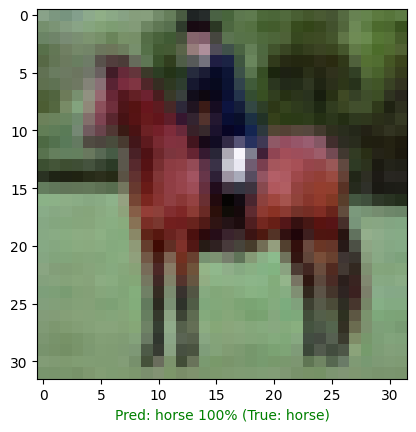

In [250]:
# Check out a random image as well as its prediction
plot_random_image(model= model_13,
                  images = X_test_norm,
                  true_labels = y_test_index,
                  classes = classes)

In [240]:
y_test_index = tf.squeeze(tf.constant(y_test))

## Create and Visualize Confusion Matrix

In [193]:
# Create a confusion matrix
import itertools
from sklearn.metrics import pair_confusion_matrix
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
def make_confusion_matrix(y_true, y_pred, classes = None, figsize =(10,10), text_size = 15 ):
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
  n_classes  = cm.shape[0]


  # Lets prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)
# Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # lABEL THE AXES
  ax.set(title='confusion matrix',
        xlabel='Predicted label',
        ylabel = 'True label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set threshold for different colors
  threshold = (cm.max()+ cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment='center',
            color= 'white' if cm[i,j]>threshold else "black",
            size = text_size)

In [194]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [195]:
# Make some predictions with our model
y_probs = model_13.predict(X_test_norm) # probs is prediction probabilities

# View the first five predictions
y_probs[:5]

313/313 [==============================] - 9s 29ms/step


array([[2.4013403e-05, 7.0974338e-06, 6.1217244e-05, 9.8919034e-01,
        1.5757447e-05, 1.0314557e-02, 3.5183367e-04, 2.1484397e-05,
        1.3217370e-05, 5.9447967e-07],
       [2.4044610e-05, 1.9162257e-04, 9.0897290e-11, 3.6498057e-10,
        7.1620432e-11, 2.9555431e-11, 1.4287045e-09, 7.9057490e-11,
        9.9978381e-01, 4.6239114e-07],
       [5.4676556e-03, 1.0488383e-02, 8.5183701e-06, 2.6041886e-05,
        2.2246782e-05, 2.3644013e-06, 3.8143895e-05, 9.8479522e-06,
        9.8387593e-01, 6.0885683e-05],
       [9.6049744e-01, 9.1944839e-04, 9.1970185e-05, 4.4408138e-05,
        1.3391342e-05, 4.6586597e-06, 1.3848736e-05, 1.0398361e-05,
        3.8035408e-02, 3.6908482e-04],
       [1.4399485e-06, 6.3823300e-06, 8.4007959e-05, 1.0053890e-04,
        1.8099219e-05, 2.1096769e-06, 9.9978417e-01, 4.0967123e-07,
        1.8895697e-06, 1.0197248e-06]], dtype=float32)

In [196]:
y_probs[0], tf.argmax(y_probs[0]), classes[tf.argmax(y_probs[0])]

(array([2.4013403e-05, 7.0974338e-06, 6.1217244e-05, 9.8919034e-01,
        1.5757447e-05, 1.0314557e-02, 3.5183367e-04, 2.1484397e-05,
        1.3217370e-05, 5.9447967e-07], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=3>,
 'cat')

In [197]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis = 1)

# View the first 10 prediciton labels
y_preds[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

In [201]:
confusion_matrix(y_true=y_test,
                 y_pred=y_preds)

array([[915,  10,  14,   6,   1,   1,  11,   3,  11,  28],
       [  5, 961,   0,   0,   0,   0,   3,   0,   1,  30],
       [ 46,   1, 747,  37,  34,  40,  81,   7,   2,   5],
       [ 11,   2,  15, 737,  30,  82,  89,  12,   7,  15],
       [ 11,   2,  16,  30, 848,  10,  69,  13,   0,   1],
       [  4,   3,  10, 112,  24, 781,  42,  14,   2,   8],
       [  4,   1,   5,  11,   5,   1, 971,   1,   1,   0],
       [  9,   0,   5,  18,  26,  32,  15, 890,   1,   4],
       [ 73,  15,   3,   2,   2,   0,   8,   0, 877,  20],
       [  7,  48,   0,   1,   1,   0,   4,   0,   7, 932]], dtype=int64)

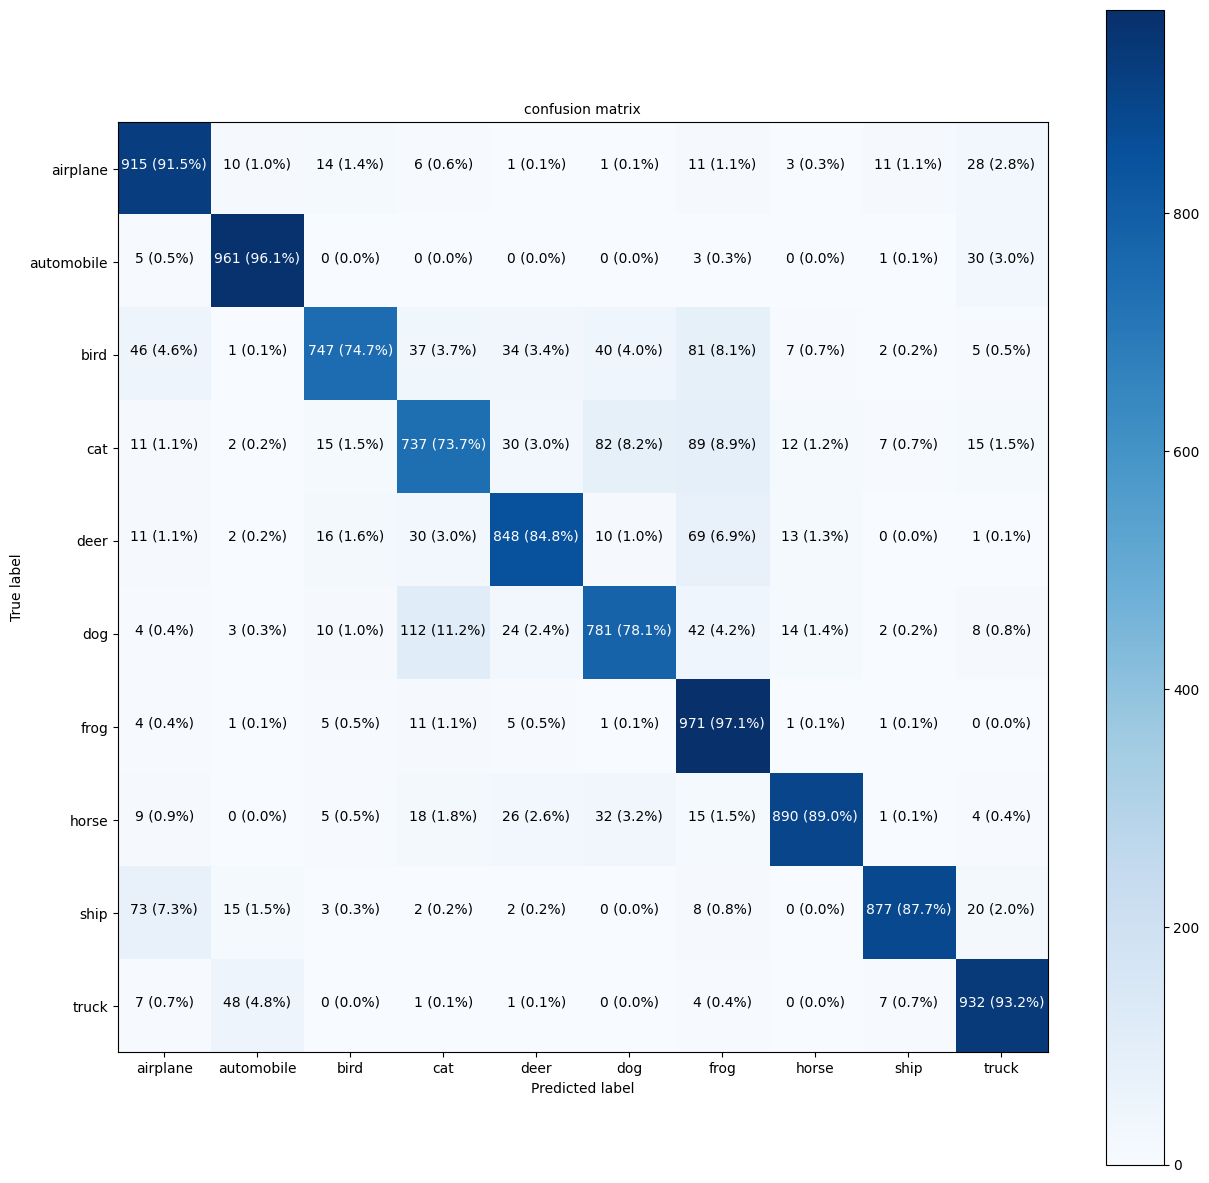

In [200]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true = y_test,
                      y_pred = y_preds,
                      classes = classes,
                      figsize = (15,15),
                      text_size = 10
)

## Save the model

In [252]:
model_13.save("CIFAR_10_Model.h5")

## Try Loading model

In [254]:
from keras.models import load_model
model = load_model("CIFAR_10_Model.h5")

## Evaluate on the Loaded model

In [259]:
model.evaluate(X_test_norm, y_test_one)
model_accuracy = model.evaluate(X_test_norm, y_test_one)[1]*100
model_accuracy

313/313 [==============================] - 9s 28ms/step - loss: 0.4065 - accuracy: 0.8659


86.58999800682068

## **Note:** this model is trained and evaluated for 50 epochs to increase accuracy you can increase epochs to 200 - 400. For further improvements